# **Práctica #1: Modelo para predicción de arritmias**

*Centro Universitario de Ciencias Exactas e Ingenierías*

*División de Tecnologías para la Integración Ciber-Humana*

*Ingeniería Biomédica*

<br>

*Mtra. Sofía Alejandra Aguilar Valdez*

7 de octubre de 2022

## **Información del equipo**

```NOMBRES:```

Edgar Giovanni Acosta Martinez / Dayana Analy Pacheco Bañuelos

```CÓDIGOS:```

216590878 / 217535226

```LINK REPOSITORIO:```https://github.com/Dayaanaly/SA-PU2-U1-Prediccion-Arritmias



## **Contenido**



1.   Resumen
2.   Marco teórico
3.   Objetivos
4.   Materiales y métodos
5.   Resultados
6.   Discusión
7.   Conclusiones
8.   Referencias



# **1. Resumen**
(100-300 palabras)

# **2. Marco teórico**

Las Redes neuronales convolucionales (CNN), se definen como un tipo de redes neuronales artificiales donde las “neuronas” corresponden a campos receptivos que se asemejan a las neuronas en la corteza visual primaria (V1) de un cerebro biológico. 

Se aplican principalmente en las matrices bidimensionales, para tareas de visión artificial, la clasificación de imágenes con diferentes características y formas especiales, y un buen ejemplo es una arritmia. 
La arritmia, o latidos cardíacos irregulares, es una alteración relacionada con la frecuencia en la actividad eléctrica del corazón.

Esta clasificación está fundamentada en tres pasos esenciales que tienen que realizarse para tener éxito dentro del modelo: preprocesamiento, extracción de características y clasificación (Essam et., 2017).
La fase de preprocesamiento no es más que asegurarse que la señal de un ECG esté en condiciones de calidad y que no contenga factores externos como el ruido que pueda afectar su posterior extracción de características y clasificación. 

Es posible monitorearlas arritmias a partir de un aparato gráfico en el que se estudian y registran las variaciones de voltaje en relación con un tiempo determinado, este aparato es el ECG. Ya que el grafico del ECG muestra los cambios en forma de un trazado con diferentes deflexiones (ondas del ECG) que corresponden con el recorrido de los impulsos eléctricos a través de las diferentes estructuras del corazón.

Con respecto a una apropiada implementación de la representación de las imágenes del ECG al modelo con una CNN (Convolutional Neural Networks) representa un desafió, puesto que las CNN es tan diseñadas para trabajar con datos en forma de cuadricula, ya que encuentran características de alto nivel buscando en los próximos de cada dato, como los pixeles en una imagen (Gharehbaghi and Khatibinia, 2015). 

Para detectar arritmias a través de un electrocardiograma, el algoritmo debe poder reconocer diferentes tipos de ondas y discernir las complejas relaciones entre ellas a lo largo del tiempo. Pero para ello necesitan “entrenarse” de previo con una cantidad importante de “muestras” de esta forma las neuronas de la red van a poder captar las características únicas y a su vez, poder generalizarlo, a esto es lo que se le conoce como el proceso de “aprendizaje de un algoritmo”. Entonces, es necesario buscar la manera de aprovechar al máximo las propiedades de aprendizaje jerárquico de la CNN.






# **3. Objetivos**
**Objetivo general**:

Desarrollar una red neuronal convolucional que sea capaz de predecir la presencia de arritmias en una señal de electrocardiografía.

Objetivos específicos:

*   Descargar y analizar el set de datos de  MIT-BIH [[1]](https://www.physionet.org/content/mitdb/1.0.0/) sobre arritmias.
*   Procesar cada uno de los 48 registros y a partir de las anotaciones, segmentar en imágenes cada uno de los complejos cardíacos presentes.
*   Procesar y acondicionar las imágenes de los complejos cardíacos para poder utilizarlas como entradas para una red neuronal convolucional
*   Crear una red neuronal convolucional que reciba las imágenes y etiquetas con entrada, y proporcione un valor entre 1 y 0 que defina si la señal presenta una arritmia o no, respectivamente.






# **4. Materiales y métodos**

## *Materiales*
La base de datos de arritmias de MIT-BIH [[1]](https://www.physionet.org/content/mitdb/1.0.0/). contiene 48 extractos de 30 minutos de registros de ECG ambulatorios de dos canales, obtenidos de 47 sujetos estudiados por el Laboratorio de Arrimias (BIH) entre 1975 y 1979.

23 registros fueron elegidos al azar de un conjunto de 4000 registros ambulatorios de ECG de 24 horas. Estos registros fueron recolectados de una población mixta de pacientes hospitalizados (60%) y pacientes ambulatorios (40%) en el hospital Beth Israel en Boston. Los 25 registros restantes fueron seleccionados del mismo conjunto para incluir las arritmias menos comune, pero con importancia clínica que no podría ser bien representadas en una pequeña muestra aleatoria.

Los registros fueron digitalizados con una frecuencia de muestreo de 360 Hz por canal con una resolución de 11 bits en un rango de 10 mV. Dos o más cardiológos realizaron las anotaciones de cada registro de manera independiente. Los desacuerdos fueron resueltos para obtener anotaciones de referencia por cada latido (110,000 anotaciones aproximadamente).

## *Métodos*

1. Esquema de metodología

Para poder realizar una red neuronal convolucional que sea capaz de predecir si un latido cardiaco presenta o no una arritmia, se implementó la siguiente metodología de trabajo:

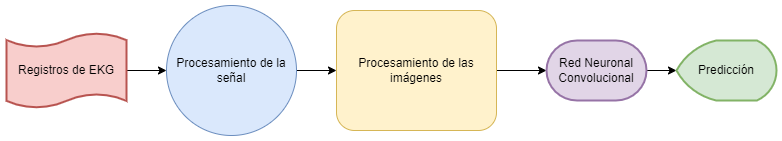

2. Implementación de código y descripción de los métodos utilizados

A continuación se describe de forma narrativa cada una de las partes de la metodología:

*Código implementado*

https://github.com/ankur219/ECG-Arrhythmia-classification

https://github.com/topics/ecg-signal?l=python

https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/Basics/custom_dataset/custom_dataset.py

In [ ]:
#Librerias necesarias para la construcción de la red neuronal convolucional
import torch
import torch.nn as nn  
import torch.optim as optim 
import torchvision.transforms as transforms  
import torchvision
import os
import pandas as pd
from skimage import io
from torch.utils.data import (
    Dataset,
    DataLoader,
) 

Montaje de Google Drive para extraer la base de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Instalación de la libreria wfdb para procesar los registros de EKG

In [ ]:
pip install wfdb

Librerias necesarias para procesar y manipular la base de datos

In [ ]:
#Liberias
import pywt
import numpy as np
import wfdb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import csv
import shutil

Carga de los registros, anotaciones y simbolos del canal 1 de cada señal de EKG

In [ ]:
directorio = os.listdir('/content/drive/MyDrive/EKG RECORDS/mitbd/')
scaler = StandardScaler()
signals = []
samples = []
symbols = []
index_hea = []
for fichero in directorio:
    if os.path.isfile(os.path.join('/content/drive/MyDrive/EKG RECORDS/mitbd/', fichero)) and fichero.endswith('.hea'):
        #archivos_hea.append(fichero)
        ind, ext = fichero.split(sep='.')
        record = wfdb.rdrecord('/content/drive/MyDrive/EKG RECORDS/mitbd/'+ind,channels=[0])
        signal = scaler.fit_transform(record.p_signal)
        annotation = wfdb.rdann('/content/drive/MyDrive/EKG RECORDS/mitbd/'+ind,'atr')
        sample = annotation.sample
        symbol = annotation.symbol
        index_hea.append(ind)
        samples.append(sample)
        symbols.append(symbol)
        signals.append(signal)

Definición de latidos invalidos y latidos anormales

In [ ]:
invalid_beat = [
    "[", "!", "]", "x", "(", ")", "p", "t", 
    "u", "`", "'", "^", "|", "~", "+", "s", 
    "T", "*", "D", "=", '"', "@"
]
abnormal_beats = [
    "L", "R", "B", "A", "a", "J", "S", "V", 
    "r", "F", "e", "j", "n", "E", "/", "f", "Q", "?"
]

Función para clasificar los latidos con base a las listas invalid_beats y abnormal beats definidas en lineas anteriores

In [ ]:
def classify_beat(symbol):
    if symbol in abnormal_beats:
        return 1
    elif symbol == "N" or symbol == ".":
        return 0 

In [ ]:
#Código opcional para dividir los registros en pequeños sets de datos, 
#para que no consumir demasiada ram, y realizar la segmentación de los complejos cardíacos
signals_set_1 = signals[0:10]
signals_set_2 = signals[10:20]
signals_set_3 = signals[20:30]
signals_set_4 = signals[30:40]
signals_set_5 = signals[40:50]

set_signals = []
set_signals.append(signals_set_1)
set_signals.append(signals_set_2)
set_signals.append(signals_set_3)
set_signals.append(signals_set_4)
set_signals.append(signals_set_5)

Segmentación de cada registro de EKG en imágenes de complejos cardiacos

In [ ]:
directory = '/content/drive/MyDrive/DEEP LEARNING/EKG IMAGES/' #Directorio donde se guardarán las imágenes
#Parte opcional que utiliza cada segmento de los registros para no saturar la memoria ram
#signals = signals[40:47]
#samples = samples[40:47]
#symbols = symbols[40:47]
#index_hea = index_hea[40:47]

cant_records = len(signals)#Cantidad de registros

for i in range(cant_records): #Iteramos sobre cada registro
  #Definimos listas vacias para almacenar muestras
  sample_health = [] #Muestras de EKG normal
  sample_sick = [] #Muestra de EKG anormal
  sample_fin = [] #Muestras finales
  name_file = index_hea[i] #Obtenemos el nombre del registro
  s = signals[i] #Obtenemos el registro que se va segmentar
  labels = samples[i] #Obtenemos las muestras (peaks) del registro
  symbol = symbols[i] #Obtenemos las anotaciones relacionadas a cada muestra
  for i, (sym) in enumerate(symbol): #Iteramos sobre cada anotacion encontrada
    band = classify_beat(sym) #Clasificamos la muestras (peak)
    if band == 0:
      sample_health.append(labels[i]) #Almacenamos las muestras de EKG normal
    elif band == 1:
      sample_sick.append(labels[i]) #Almacenamos las muestras de EKG anormal
  #Igualamos la cantidad de muestras normales y anormales para evadir algun sesgo
  if len(sample_health) > len(sample_sick):
    sample_health = sample_health[1:len(sample_sick)+1]
  elif len(sample_health) < len(sample_sick):
    sample_sick = sample_sick[1:len(sample_health)+1]

  for b in range(2): #Iteramos dos veces para las muestras sanas y anormales
    if b == 0:
      sample_fin = sample_health
    elif b == 1:
      sample_fin = sample_sick
    for i, (peak) in enumerate(sample_fin): #Iteramos sobre cada muestra

      w_start = peak-100 #Definimos el punto de inicio de la segmentación de ventana
      w_end = peak+100 #Definimos el punto final de segmentación de ventana
      s_sample = s[w_start:w_end] #Obtenemos la ventana de muestreo del complejo

      #Se define la figura, sus dimensiones, y el tamaño de píxeles de la imagen
      #El tamaño de pixeles se obtiene mediante el figsize y el parametro dpi
      #Tamaño en pixeles de cada imagen = [10,10]*20 = 200x200 pixeles
      fig = plt.figure(figsize=(10,10),frameon=False, dpi=20) 
      plt.plot(s_sample, linewidth=4) #Se muestra la gráfica de la muestra
      plt.xticks([])
      plt.yticks([])
      for spine in plt.gca().spines.values():
          spine.set_visible(False)

      if b == 0: #Si la gráfica corresponde a una muestra de EKG normal
        #Se define el directorio para guardar la imagen y se guarda en formato .jpg
        filename = directory +'NORMAL'+ '/' + name_file + '_n_' + str(i)+'.jpg'
        fig.savefig(filename)
        plt.close(fig)

      elif b == 1: #si la gráfica corresponde a una muestra de EKG anormal
        #Se define el directorio para guardar la imagen y se guarda en formato .jpg
        filename = directory + 'SICK' + '/' + name_file + '_s_' + str(i) + '.jpg'
        fig.savefig(filename)
        plt.close(fig)

Lectura de las imágenes de los latidos, redimensionamiento y conversión a escala de grises. Se define también el vector de etiquetas de clasificación

In [ ]:
x = [] #Lista vacia para almacenar cada imagen
y = [] #Lista vacia para almacenar cada etiqueta

#Definimos el directorio en donde se encuentran las imágenes a cargar
directory = '/content/drive/MyDrive/DEEP LEARNING/EKG IMAGES/'

#Iteramos por cada imagen de EKG normal presente en el directorio
for image in os.listdir(directory+'/EKG NORMAL/'):
  img = cv2.imread(directory+'/EKG NORMAL/'+image) #Leemos la imagen
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Se convierte a escala de grises
  img = cv2.resize(img,[100,100]) #Se redimensiona a 100x100 pixeles
  x.append(img) #Se almacena en la lista x
  y.append(0) #Se asigna "0" en la lista y para designar que la muestra de EKG es normal

#Se obtiene la cantidad de imagenes clasificadas como normales
len_x_normal = len(x)

#Iteramos por cada imagen de EKG anormal presente en el directorio
for image in os.listdir(directory+'/EKG SICK/'):
  img = cv2.imread(directory+'/EKG SICK/'+image) #Leemos la imagen
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Se convierte a escala de grises
  img = cv2.resize(img,[100,100]) #Se redimensiona a 100x100 pixeles
  x.append(img) #Se almacena en la lista x, junto con las imagenes de EKG normal
  y.append(1) # Se asigna "1" en la lista y para designar que la muestra de EKG es anormal

#Se obtiene la cantidad de imágenes clasificadas como anormales
len_x_sick = len(x)-len_x_normal

Se cambian las dimensiones de cada imagen para su entrada a la red neuronal convolucional

In [ ]:
images_ekg = [] #Lista vacia para almacenar imagenes con la dimensión correcta 
for i in range(len(x)): #Iteramos sobre cada imagen almacenada en x
  x_2.append(x[i].reshape(100,100,1)) #Agregamos una nueva dimensión para designar la escala de grises

Conversión de las imágenes y etiquetas a arrays de Numpy. Normalización de cada imagen para hacer más eficiente el proceso de entrenamiento de la red neuronal convolucional

In [ ]:
images_ekg = np.array(images_ekg).astype(float)/255 #Normalización de las imágenes
y_label = np.array(y)

Comprobación del tamaño del set de imagenes

In [ ]:
len(images_ekg)

20680

Segmentamos el set de datos para tener imágenes que no haya visto la red neuronal ni siquiera en la validación, y poder probar su exactitud con imagenes totalmente nuevas de EKG normal y EKG anormal

In [ ]:
x_sick_test = images_ekg[-500:] #Almacenamos 500 imagenes de EKG anormal
y_sick_test = y_label[-500:]
images_ekg = images_ekg[0:len(images_ekg)-500] #Las quitamos de las imágenes para la red neuronal convolucional
y_label = y_label[0:len(y_label)-500]
x_normal_test = images_ekg[0:500] #Almacenamos 500 imagenes de EKG anormal
y_normal_test = y_label[0:500]
images_ekg = images_ekg[500:len(images_ekg)] #Las quitamos de las imágenes para la red neuronal convolucional
y_label = y_label[500:len(y_label)]

Visualizamos una muestra de EKG normal y una muestra de EKG anormal del set de datos para la red neuronal convolucional

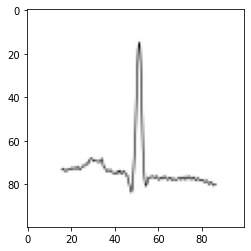

In [ ]:
plt.figure(figsize=[20,20])
plt.subplot(1,2,1)
plt.imshow(images_ekg[1].reshape(100,100),cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("EKG normal")
plt.subplot(1,2,2)
plt.imshow(images_ekg[-1].reshape(100,100),cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("EKG anormal")

Importamos tensorflow para la implementación de la red neuronal convolucional

In [ ]:
import tensorflow as tf

Definimos la estructura y las capas de la red neuronal convolucional

In [ ]:
modelo_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Compilamos el modelo, utilizando un optimizador "Adam" y una función de perdida "binary_crossentropy"

In [ ]:
modelo_cnn.compile('adam','binary_crossentropy',metrics=['accuracy'])

Importamos una herramienta de tensorflow para visualizar de manera gráfica el desempeño de la red neuronal convolucional

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

Entrenamos el modelo con 85% de los datos para entrenamiento, y el restante para validación. Se utiliza un tamaño de batch de 16 y se entrena por 5 épocas

In [ ]:
tensorboardCNN = TensorBoard(log_dir='logs/modelo_cnn') #Se asignan los datos de accuracy y loss para su graficación
modelo_cnn.fit(x_2,y,batch_size=16,validation_split=0.15,epochs=5,callbacks=[tensorboardCNN]) # Se entrena el modelo

Se visualiza su desempeño de manera gráfica

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/

Probamos el modelo con los datos de test de EKG normal y EKG anormal que la red neuronal convolucional no ha visto jamas

In [ ]:
preds_normal = modelo_cnn.predict(x_normal_test)
for pred in preds_normal:
  print(np.round(pred))

preds_sick = modelo_cnn.predict(x_sick_test)
for pred in preds_sick:
  print(np.round(pred))

Calculamos la exactitud de sus predicciones con los datos de test de EKG normal y EKG anormal

In [ ]:
preds_normal = np.round(preds_normal)
len(preds_normal[preds_normal==0])/len(x_normal_test)*100

preds_sick = np.round(preds_sick)
len(preds_sick[preds_sick==0])/len(x_sick_test)*100

# **5. Resultados**
(300-800 palabras, incluir mínimo 2 figuras).

# **6. Discusión**

1.	Definir funcionamiento
2.	Pruebas (underfitting o overfitting)
3.	Comparativa con otro modelo (Que le hace falta para complementar)

El modelo CNN predictor de arritmias, demuestra ser una buena opción si se busca optimizar el número de capas internas que una red neuronal convolucional requiere para su entrenamiento y prueba.

(Aun por terminar)






# **7. Conclusiones**
(100-300 palabras).

Con tus propias palabras describe si se cumplen o no los objetivos en base al análisis de los resultado.

•	¿El modelo predice las arritmias? 

•	¿Cómo lo justificaron y cuáles son sus limitaciones? 

•	¿Cuáles son sus perspectivas?


# **8. Referencias**

[1] Moody GB, Mark RG. The impact of the MIT-BIH Arrhythmia Database. IEEE Eng in Med and Biol 20(3):45-50 (May-June 2001). (PMID: 11446209)

[2] Santander-Baños, F., Hernández-Romero, N., Barragán-Vite, I., Karelin, O. & Medina-Marín, J. (2022, 24 junio). Clasificación de Arritmias Cardíacas mediante Redes Neuronales Convolucionales y Optimización por Enjambre de Partículas. Pädi Boletín Científico de Ciencias Básicas e Ingenierías del ICBI, 10(Especial2), 42-55. https://doi.org/10.29057/icbi.v10iespecial2.8655

[3] Anderson, C. W., Sijercic, Z., 1996. Classification of eeg signals from four subjects during five mental tasks. In: Solving engineering problems with neural networks: proceedings of the conference on engineering applications in neural networks (EANN'96). Turkey, pp. 407-414.

[4] Llorella, F. R., Iáñez, E., Azorín, J. M. & Patow, G. (2021, 17 diciembre). Discriminador binario de imaginación visual a partir de señales EEG basado en redes neuronales convolucionales. Revista Iberoamericana de Automática e Informática industrial, 19(1), 108-116. https://doi.org/10.4995/riai.2021.14987


